<a href="https://colab.research.google.com/github/arshad831/python-realestate-workshops/blob/main/dld_open_contract-8thaug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps for Real Estate Data Analysis

1. Share one month of Data - July 2023 for code interpreter

2. Share 2 years of data 2021-07-01 till date  2023-07-01
Download from https://nas.io/artificial-intelligence-guild/otok

3. Python Data Analysis

4. Build charts


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('2yeardata.csv')

# Display the first few rows of the dataframe
df.head(50)

In [5]:
# Step 1: Understanding the Data

# Get the number of rows and columns
print(f"The dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Get the list of columns along with their data types
print(f"Columns and their data types:\n{df.dtypes}\n")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Number of missing values in each column:\n{missing_values}\n")


The dataset consists of 126368 rows and 29 columns.

Columns and their data types:
contract_id                    object
contract_reg_type_id            int64
contract_reg_type_en           object
contract_start_date            object
contract_end_date              object
contract_amount                 int64
annual_amount                   int64
no_of_prop                      int64
line_number                     int64
is_free_hold                    int64
ejari_bus_property_type_id      int64
ejari_bus_property_type_en     object
ejari_property_type_id        float64
ejari_property_type_en         object
ejari_property_sub_type_id    float64
ejari_property_sub_type_en     object
property_usage_en              object
project_number                float64
project_name_en                object
master_project_en              object
area_id                         int64
area_name_en                   object
actual_area                   float64
nearest_landmark_en            object
neare

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126368 entries, 0 to 126367
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   contract_id                 126368 non-null  object 
 1   contract_reg_type_id        126368 non-null  int64  
 2   contract_reg_type_en        126368 non-null  object 
 3   contract_start_date         126368 non-null  object 
 4   contract_end_date           126368 non-null  object 
 5   contract_amount             126368 non-null  int64  
 6   annual_amount               126368 non-null  int64  
 7   no_of_prop                  126368 non-null  int64  
 8   line_number                 126368 non-null  int64  
 9   is_free_hold                126368 non-null  int64  
 10  ejari_bus_property_type_id  126368 non-null  int64  
 11  ejari_bus_property_type_en  126368 non-null  object 
 12  ejari_property_type_id      126368 non-null  float64
 13  ejari_property

In [7]:
df.head()

,contract_id,contract_reg_type_id,contract_reg_type_en,contract_start_date,contract_end_date,contract_amount,annual_amount,no_of_prop,line_number,is_free_hold,...,master_project_en,area_id,area_name_en,actual_area,nearest_landmark_en,nearest_metro_en,nearest_mall_en,tenant_type_id,tenant_type_en,year_month
0,CRT1086344506,2,Renew,2022-01-02,31-01-2024,320000,160000,1,1,1,...,Meadows 1,352,Al Thanayah Fourth,639.0,Sports City Swimming Academy,Damac Properties,Marina Mall,1.0,Person,2022-01
1,CRT1092248096,2,Renew,2022-01-07,30-06-2025,150000,50000,1,1,1,...,NaN,465,Wadi Al Safa 3,3734.0,IMG World Adventures,NaN,NaN,2.0,Authority,2022-01
2,CRT1173757836,2,Renew,2021-08-02,07-02-2022,130000,130000,2,1,1,...,NaN,526,Business Bay,107.0,Downtown Dubai,Business Bay Metro Station,Dubai Mall,2.0,Authority,2021-08
3,CRT1173757836,2,Renew,2021-08-02,07-02-2022,130000,130000,2,2,1,...,NaN,526,Business Bay,95.0,Downtown Dubai,Business Bay Metro Station,Dubai Mall,2.0,Authority,2021-08
4,CRT1185082686,2,Renew,2023-01-04,31-03-2033,280000,28000,1,1,0,...,NaN,368,Al Barsha First,312.0,Burj Al Arab,Sharaf Dg Metro Station,Mall of the Emirates,2.0,Authority,2023-01


**Data Cleaning:**

The data cleaning process will depend on the requirements of your analysis. Here are some general steps you can take:

Handle missing values: Depending on the importance of the variable, you can either drop the rows/columns with missing values, or fill them in with appropriate methods (mean, median, mode, or a specific value).

Remove duplicates: If there are any duplicated rows, you can remove them to prevent skewed analysis.

Outliers: Check for outliers in the dataset, especially in numerical columns. Depending on your requirements, you might need to handle these outliers.

In [8]:
# Step 2: Data Cleaning

# Fill missing values in 'actual_area' with the median
df['actual_area'].fillna(df['actual_area'].median(), inplace=True)

# Fill missing values in categorical columns with the mode
categorical_cols_with_nan = ['ejari_property_type_id', 'ejari_property_type_en', 'ejari_property_sub_type_id',
                             'ejari_property_sub_type_en', 'property_usage_en', 'project_number', 'project_name_en',
                             'master_project_en', 'nearest_landmark_en', 'nearest_metro_en', 'nearest_mall_en']

for col in categorical_cols_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert 'contract_start_date' and 'contract_end_date' to datetime format
df['contract_start_date'] = pd.to_datetime(df['contract_start_date'])
df['contract_end_date'] = pd.to_datetime(df['contract_end_date'])

# Check if there are any missing values left
missing_values = df.isnull().sum()
print(f"Number of missing values in each column:\n{missing_values}\n")


<ipython-input-8-4c5555f5b9de>:16: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['contract_end_date'] = pd.to_datetime(df['contract_end_date'])


Number of missing values in each column:
contract_id                   0
contract_reg_type_id          0
contract_reg_type_en          0
contract_start_date           0
contract_end_date             0
contract_amount               0
annual_amount                 0
no_of_prop                    0
line_number                   0
is_free_hold                  0
ejari_bus_property_type_id    0
ejari_bus_property_type_en    0
ejari_property_type_id        0
ejari_property_type_en        0
ejari_property_sub_type_id    0
ejari_property_sub_type_en    0
property_usage_en             0
project_number                0
project_name_en               0
master_project_en             0
area_id                       0
area_name_en                  0
actual_area                   0
nearest_landmark_en           0
nearest_metro_en              0
nearest_mall_en               0
tenant_type_id                1
tenant_type_en                1
year_month                    1
dtype: int64



In [ ]:
df.info()

In [ ]:
df[df.contract_amount==df.contract_amount.max()]

In [11]:
# Group the data by 'area_name_en' and compute the number of properties, max, min, and average of 'annual_amount'
grouped_data = df.groupby('area_name_en').agg(
    Number_of_Properties=('no_of_prop', 'sum'),
    Max_Annual_Amount=('annual_amount', 'max'),
    Min_Annual_Amount=('annual_amount', 'min'),
    Average_Annual_Amount=('annual_amount', 'mean')
)

# Display the grouped data
grouped_data


,Number_of_Properties,Max_Annual_Amount,Min_Annual_Amount,Average_Annual_Amount
area_name_en,,,,
Abu Hail,291,420000,10000,71803.818505
Al Aweer First,60,290000,2500,77146.551724
Al Aweer Second,11,75000,15000,35617.454545
Al Bada,555,7440000,10000,116204.529032
Al Baraha,342,270000,1000,28247.953216
...,...,...,...,...
Wadi Al Safa 7,1493,375000,5000,139361.869390
Wadi Alshabak,5,195000,10000,92000.000000
Warsan Fourth,446,80000,5000,30852.547085


In [ ]:
df['tenant_type_en'].unique()

array(['Person', 'Authority', nan], dtype=object)

In [12]:
# Sort the data by 'Max_Annual_Amount' in descending order
grouped_data_sorted = grouped_data.sort_values(by='Number_of_Properties', ascending=False)

# Display the sorted data
grouped_data_sorted

,Number_of_Properties,Max_Annual_Amount,Min_Annual_Amount,Average_Annual_Amount
area_name_en,,,,
Jabal Ali Industrial First,130920,4000000,75000,2.331187e+06
Dubai Investment Park First,95926,5393723,24000,2.215154e+06
Business Bay,85729,3391290,1,1.112519e+05
Rega Al Buteen,78463,200000,2500,1.720924e+04
Marsa Dubai,30636,392424541,200,1.449639e+05
...,...,...,...,...
Al Ruwayyah,1,165000,165000,1.650000e+05
Al Yufrah 2,1,85000,85000,8.500000e+04
Bur Dubai,1,18000,18000,1.800000e+04


In [ ]:
df[df.annual_amount==df.annual_amount.max()]

,contract_id,contract_reg_type_id,contract_reg_type_en,contract_start_date,contract_end_date,contract_amount,annual_amount,no_of_prop,line_number,is_free_hold,...,master_project_en,area_id,area_name_en,actual_area,nearest_landmark_en,nearest_metro_en,nearest_mall_en,tenant_type_id,tenant_type_en,year_month
28362,CRT1658004826,1,New,2021-10-20,2022-10-19,392424541,392424541,1,1,1,...,Business Bay,330.0,Marsa Dubai,74.0,Burj Al Arab,Marina Towers,Marina Mall,2.0,Authority,2021-10


In [ ]:
df.info()

In [13]:
df.groupby('area_name_en').count()

,contract_id,contract_reg_type_id,contract_reg_type_en,contract_start_date,contract_end_date,contract_amount,annual_amount,no_of_prop,line_number,is_free_hold,...,project_name_en,master_project_en,area_id,actual_area,nearest_landmark_en,nearest_metro_en,nearest_mall_en,tenant_type_id,tenant_type_en,year_month
area_name_en,,,,,,,,,,,,,,,,,,,,,
Abu Hail,281,281,281,281,281,281,281,281,281,281,...,281,281,281,281,281,281,281,281,281,281
Al Aweer First,58,58,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
Al Aweer Second,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
Al Bada,465,465,465,465,465,465,465,465,465,465,...,465,465,465,465,465,465,465,465,465,465
Al Baraha,342,342,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wadi Al Safa 7,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493,...,1493,1493,1493,1493,1493,1493,1493,1493,1493,1493
Wadi Alshabak,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Warsan Fourth,446,446,446,446,446,446,446,446,446,446,...,446,446,446,446,446,446,446,446,446,446


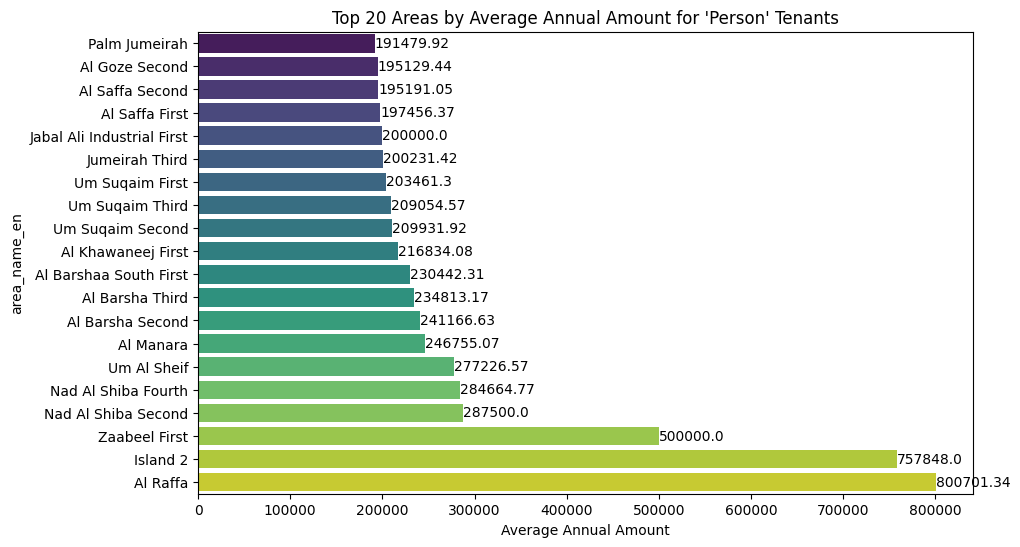

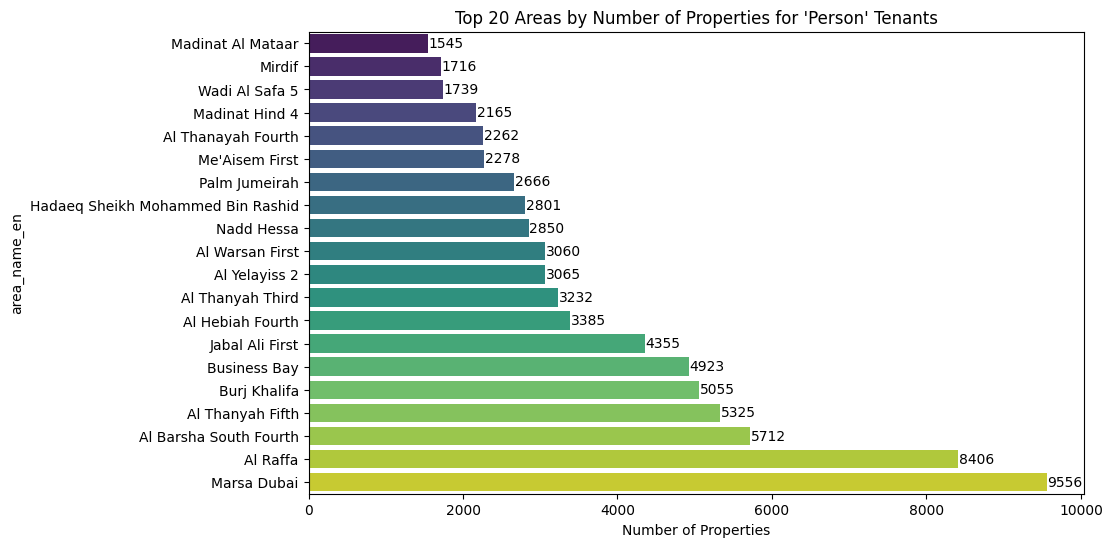

In [18]:
# Separate plots for Average Annual Amount and Number of Properties, sorted by value
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where tenant_type_en is 'Person'
df_person = df[df['tenant_type_en'] == 'Person']

# Calculate the average annual amount and number of properties by area, sorted by value
avg_annual_amount_by_area_sorted = df_person.groupby('area_name_en')['annual_amount'].mean().sort_values(ascending=True)
num_properties_by_area_sorted = df_person.groupby('area_name_en')['no_of_prop'].sum().sort_values(ascending=True)

# Plot the average annual amount by area with data labels and horizontal bars, sorted by value
plt.figure(figsize=(10, 6))
barplot_avg_annual_sorted = sns.barplot(y=avg_annual_amount_by_area_sorted.index[-20:], x=avg_annual_amount_by_area_sorted.values[-20:], palette='viridis', orient='h')
plt.title('Top 20 Areas by Average Annual Amount for \'Person\' Tenants')
plt.xlabel('Average Annual Amount')

# Adding data labels
for p in barplot_avg_annual_sorted.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, round(width, 2), va='center')

plt.show()

# Plot the number of properties by area with data labels and horizontal bars, sorted by value
plt.figure(figsize=(10, 6))
barplot_num_prop_sorted = sns.barplot(y=num_properties_by_area_sorted.index[-20:], x=num_properties_by_area_sorted.values[-20:], palette='viridis', orient='h')
plt.title('Top 20 Areas by Number of Properties for \'Person\' Tenants')
plt.xlabel('Number of Properties')

# Adding data labels
for p in barplot_num_prop_sorted.patches:
    width = p.get_width()
    plt.text(width + 10, p.get_y() + p.get_height()/2, int(width), va='center')

plt.show()
